# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [202]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Здесь отключаю предупреждения, которые вылезают при испрользовании inplace в библиотеке pandas(не очень приятно их видеть):

In [204]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [205]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 25.0MB/s]


In [206]:
data = pd.read_csv('./train.csv')

In [207]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [208]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4273,14,80.45,1072,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,1
249,71,83.20,6126.1,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,0
2190,69,23.95,1713.1,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4056,63,108.25,6780.1,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),0
2762,35,81.60,2815.25,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,One year,Yes,Bank transfer (automatic),0


In [209]:
data.isnull().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Пропущенных значений нет.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Можно заметить, что столбец TotalSpent имеет тип object, хотя должен быть числовым. Исследуем это:

In [211]:
data["TotalSpent"].value_counts().index

Index([' ', '20.2', '19.75', '20.05', '19.65', '19.9', '20.4', '75.3', '20.15',
       '45.3',
       ...
       '713', '1474.75', '24.25', '4265', '562.6', '41.85', '4326.25', '950.2',
       '4264', '1375.6'],
      dtype='object', name='TotalSpent', length=4978)

9 строчек имеют значение ' ', заменим это на Nan.

In [212]:
data["TotalSpent"].replace(" ", np.nan, inplace=True)
data["TotalSpent"] = data["TotalSpent"].astype(float)
data["TotalSpent"].value_counts()

,count
TotalSpent,
20.20,9
19.75,8
20.05,6
19.65,6
19.90,5
...,...
41.85,1
4326.25,1
950.20,1


In [213]:
data.isnull().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Так как всего 9 строчек имеют пропуски в столбце TotalSpent, можно их просто удалить, но попробую заполнить медианным значением.

In [214]:
data.fillna(data["TotalSpent"].median(), inplace=True)
data.isnull().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим гистограммы и boxplot для численных признаков:

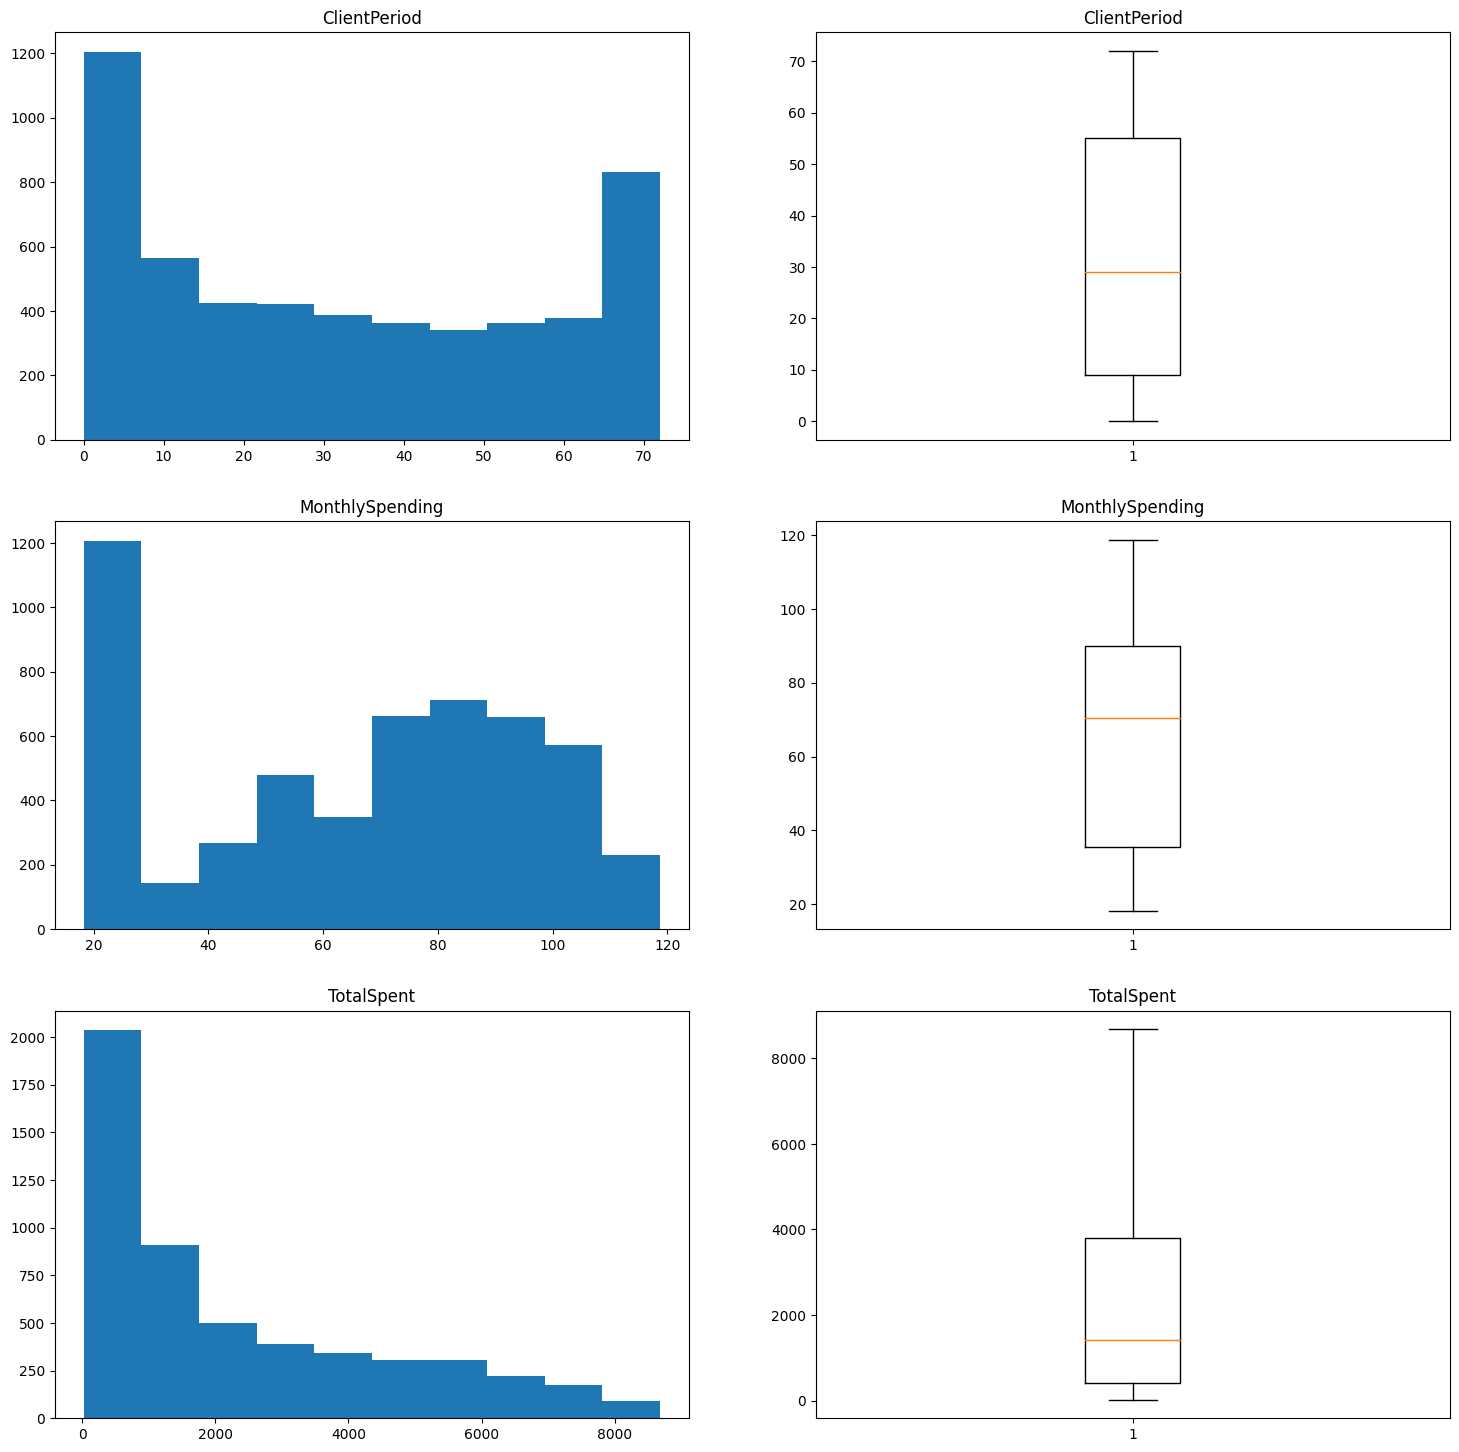

In [215]:
fig, ax = plt.subplots(len(num_cols), 2, figsize=(18, 18))
for i, col in enumerate(num_cols):
    # Гистограмма
    ax[i, 0].hist(data[col])
    ax[i, 0].set_title(col)

    # Boxplot
    ax[i, 1].boxplot(data[col])
    ax[i, 1].set_title(col)

plt.show()


Построим круговые диаграммы для категориальных признаков:

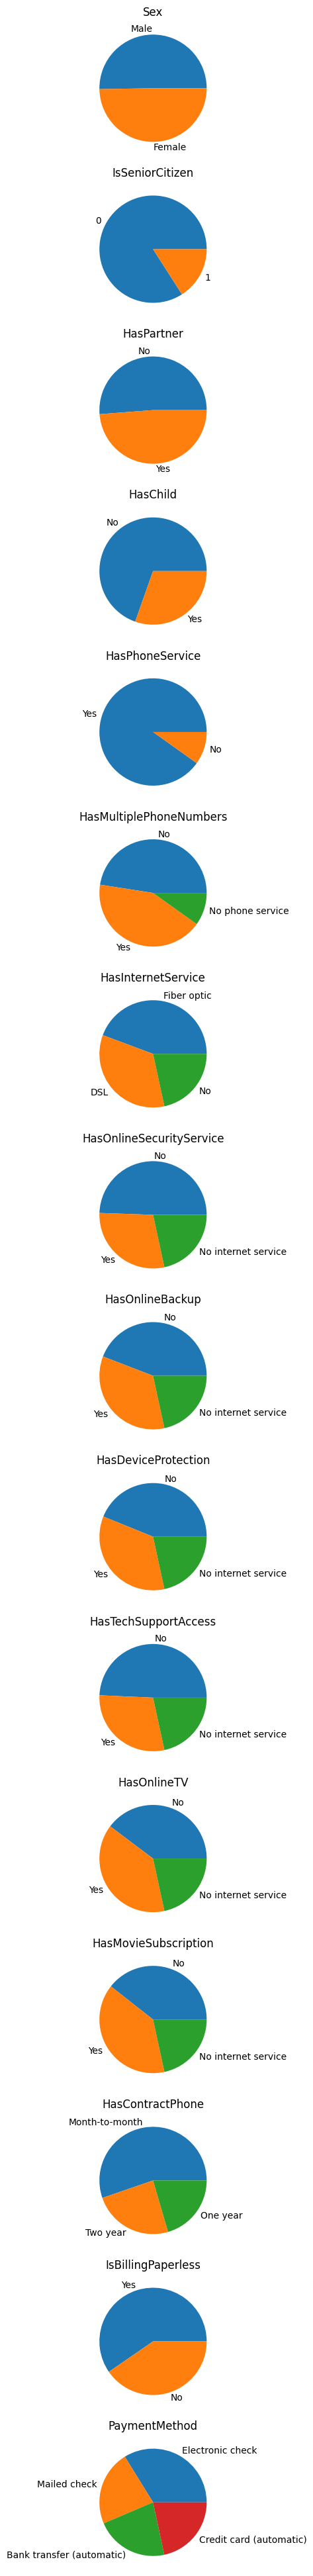

In [216]:
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(18,50))

for i, col in enumerate(cat_cols):
  value_counts = data[col].value_counts()
  ax[i].pie(value_counts.values, labels=value_counts.index)
  ax[i].set_title(col)

plt.show()

Посмотрим на распределение целевой переменной:

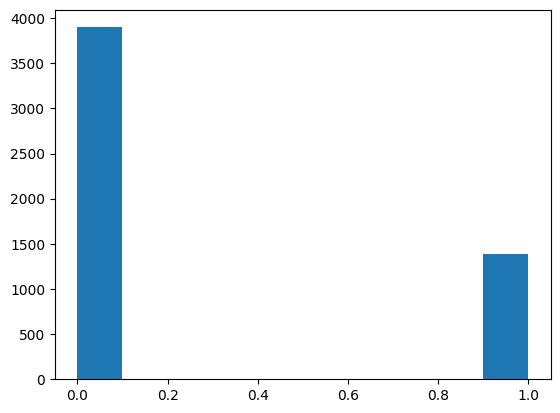

,proportion
Churn,
0,0.737978
1,0.262022


In [217]:
plt.hist(data[target_col])
plt.show()
data[target_col].value_counts(normalize=True)

Положительного класса почти в 3 раза меньше. Классы несбалансированные

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [218]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Создание трансформера для числовых и категориальных признаков:

In [219]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols), ('cat', OneHotEncoder(), cat_cols)])

Создание пайплайна и подбор гиперпараметров с кроссвалидацией:

In [220]:
pipeline = make_pipeline(preprocessor, LogisticRegression())
param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring="roc_auc", refit=True, n_jobs=-1)
grid_search.fit(data[feature_cols], data[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [221]:
print(f"Лучший параметр C: {grid_search.best_params_}")
print(f"ROC-AUC: {grid_search.best_score_}")

Лучший параметр C: {'logisticregression__C': 10}
ROC-AUC: 0.8450324270643002


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [222]:
!pip install catboost
import catboost

Разделим данные на train/valid:

In [223]:
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

Обучим модель со стандартными параметрами:

In [224]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.019062
0:	learn: 0.6807559	total: 19.4ms	remaining: 19.4s
1:	learn: 0.6694424	total: 34.4ms	remaining: 17.2s
2:	learn: 0.6580835	total: 57.8ms	remaining: 19.2s
3:	learn: 0.6471690	total: 73.5ms	remaining: 18.3s
4:	learn: 0.6364577	total: 91.9ms	remaining: 18.3s
5:	learn: 0.6270838	total: 121ms	remaining: 20.1s
6:	learn: 0.6182691	total: 138ms	remaining: 19.6s
7:	learn: 0.6099973	total: 147ms	remaining: 18.2s
8:	learn: 0.6015843	total: 166ms	remaining: 18.3s
9:	learn: 0.5941679	total: 177ms	remaining: 17.5s
10:	learn: 0.5866433	total: 188ms	remaining: 16.9s
11:	learn: 0.5786522	total: 207ms	remaining: 17s
12:	learn: 0.5715017	total: 223ms	remaining: 17s
13:	learn: 0.5648837	total: 238ms	remaining: 16.8s
14:	learn: 0.5587467	total: 251ms	remaining: 16.5s
15:	learn: 0.5534326	total: 263ms	remaining: 16.2s
16:	learn: 0.5473124	total: 279ms	remaining: 16.1s
17:	learn: 0.5422088	total: 288ms	remaining: 15.7s
18:	learn: 0.5365551	total: 303ms	remaining: 15.7s
19:	learn:

Проверим качество:

In [225]:
roc_auc_test = roc_auc_score(y_test, y_test_predicted)
print("Accuracy test: %.4f" % roc_auc_test)
roc_auc_train = roc_auc_score(y_train, y_train_predicted)
print("Accuracy train: %.4f" % roc_auc_train)

Accuracy test: 0.8583
Accuracy train: 0.8903


In [226]:
boosting_model_param = catboost.CatBoostClassifier(n_estimators=200, silent=True, cat_features=cat_cols, eval_metric='AUC')
grid_search = GridSearchCV(
    boosting_model_param,
    {'l2_leaf_reg': np.linspace(0, 1, 20)},
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7bbf2c266aa0>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='roc_auc')

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [227]:
print(f"Лучшиe параметрa: {grid_search.best_params_}")
print(f"ROC-AUC: {grid_search.best_score_}")

Лучшиe параметрa: {'l2_leaf_reg': 0.42105263157894735}
ROC-AUC: 0.847478517954006


ВАШ ОТВЕТ

# Предсказания

In [228]:
best_model = grid_search

In [229]:
X_test = pd.read_csv('./test.csv')
X_test["TotalSpent"].replace(" ", np.nan, inplace=True)
X_test["TotalSpent"] = X_test["TotalSpent"].astype(float)
X_test.fillna(data["TotalSpent"].median(), inplace=True)
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.